## Observations and Insights 

In [472]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import sem, pearsonr
import numpy as np
from scipy.stats import linregress


# Study data files
filepath = "C:\\Users\\pmaxl\\OneDrive\\Desktop\\BootCamp\\Homework\\matplotlib-challenge\\"
mouse_metadata_path = "mouse_data.csv"
study_results_path = "study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(filepath + mouse_metadata_path)
study_results = pd.read_csv(filepath + study_results_path)

# Combine the data into a single dataset
mouse_metadata.drop_duplicates("Mouse ID")
mouse_data = mouse_metadata.merge(study_results, how="inner", on="Mouse ID")

# Display the data table for preview
mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [473]:
# Checking the number of mice.
print(len(mouse_data['Mouse ID'].unique()))


249


In [474]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
str_times = []
spec_id = []
for x in range(len(mouse_data)):
    time = str(mouse_data.iloc[x, 5])
    str_times.append(time)
for x in range(len(mouse_data)):
    spec = f'{mouse_data.iloc[x, 0]} - {str_times[x]}d'
    spec_id.append(spec)
    
mouse_data2 = mouse_data.copy()
mouse_data2['Mouse ID'] = spec_id

mouse_results_cln.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403 - 0d,Ramicane,Male,21,16,0,45.000000,0
1,k403 - 5d,Ramicane,Male,21,16,5,38.825898,0
2,k403 - 10d,Ramicane,Male,21,16,10,35.014271,1
3,k403 - 15d,Ramicane,Male,21,16,15,34.223992,1
4,k403 - 20d,Ramicane,Male,21,16,20,32.997729,1
5,k403 - 25d,Ramicane,Male,21,16,25,33.464577,1
6,k403 - 30d,Ramicane,Male,21,16,30,31.099498,1
7,k403 - 35d,Ramicane,Male,21,16,35,26.546993,1
8,k403 - 40d,Ramicane,Male,21,16,40,24.365505,1
9,k403 - 45d,Ramicane,Male,21,16,45,22.050126,1


In [475]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data2.loc[mouse_data2['Mouse ID'].duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989 - 0d,Propriva,Female,21,26,0,45.000000,0
911,g989 - 5d,Propriva,Female,21,26,5,47.570392,0
913,g989 - 10d,Propriva,Female,21,26,10,49.880528,0
915,g989 - 15d,Propriva,Female,21,26,15,53.442020,0
917,g989 - 20d,Propriva,Female,21,26,20,54.657650,1


In [476]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_cln = mouse_data.drop_duplicates("Mouse ID")
mice_cln.reset_index(inplace = True, )
mice_cln.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.0,0
1,10,s185,Capomulin,Female,3,17,0,45.0,0
2,20,x401,Capomulin,Female,16,15,0,45.0,0
3,30,m601,Capomulin,Male,22,17,0,45.0,0
4,40,g791,Ramicane,Male,11,16,0,45.0,0


In [477]:
# Checking the number of mice in the clean DataFrame.
len(mice_cln)


249

## Summary Statistics

In [478]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_data = {"Mean": mouse_results_cln.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 
                "Median": mouse_results_cln.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),  
                "Variance": mouse_results_cln.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(), 
                "Standard Deviation": mouse_results_cln.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), 
                "SEM": mouse_results_cln.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
               }

summary_stats_table = pd.DataFrame(summary_data)
summary_stats_table




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [479]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_table = mouse_results_cln.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

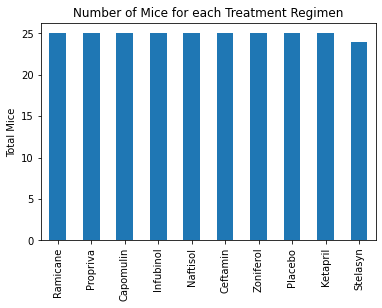

In [480]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

spec_drug_ct = mice_cln["Drug Regimen"].value_counts()
ax=spec_drug_ct.plot.bar(title="Number of Mice for each Treatment Regimen")
ax.set_ylabel("Total Mice")
plt.show()

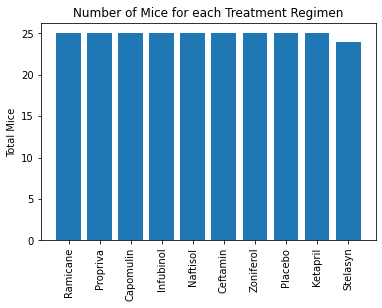

In [481]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(x= spec_drug_ct.index, height=spec_drug_ct)
plt.xticks(rotation=90)
plt.ylabel("Total Mice")
plt.title("Number of Mice for each Treatment Regimen")
plt.show()



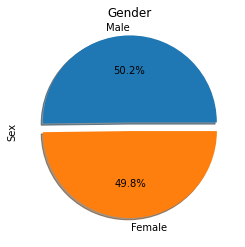

In [482]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender=mice_cln['Sex'].value_counts()
mouse_gender.plot.pie(y = mouse_gender, autopct='%1.1f%%', explode=(.1, 0), shadow=True, title="Gender")
plt.show()


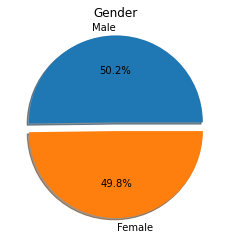

In [483]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender, labels=mouse_gender.index, autopct='%1.1f%%', explode=(.1, 0), shadow=True)
plt.title("Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [484]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
sorted_mouse_data= mouse_data.sort_values(by=["Timepoint"], ascending=True)
final_mouse = sorted_mouse_data.drop_duplicates('Mouse ID', keep='last')

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
select_treatments = final_mouse[final_mouse["Drug Regimen"].isin(drugs)]
select_treatments.reset_index(drop=True, inplace = True)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
select_treatments



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,t573,Ceftamin,Female,15,27,0,45.000000,0
1,u153,Ceftamin,Female,11,25,0,45.000000,0
2,b447,Ceftamin,Male,2,30,0,45.000000,0
3,x226,Ceftamin,Male,23,28,0,45.000000,0
4,w678,Ramicane,Female,5,24,5,43.166373,0
...,...,...,...,...,...,...,...,...
95,i738,Capomulin,Female,23,20,45,37.311846,2
96,j989,Ramicane,Male,8,19,45,36.134852,1
97,c139,Infubinol,Male,11,28,45,72.226731,2
98,i177,Ramicane,Male,10,18,45,33.562402,3


In [485]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes  
# add subset  
# Determine outliers using upper and lower bounds

 
    
tumor_vol= [final_mouse[final_mouse["Drug Regimen"] == drug] for drug in drugs]
outliers=[]    
    
    
for x in range(len(tumor_vol)):
    
    drug_tumor_vol = tumor_vol[x]
    quartiles = drug_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    q25 = quartiles[0.25]
    q75 = quartiles[0.75]
    iqr = q75-q25
    lower_bound = q25 - (1.5*iqr)
    upper_bound = q75 + (1.5*iqr)
    
    outliers.append(drug_tumor_vol[drug_tumor_vol["Tumor Volume (mm3)"]>upper_bound])
    outliers.append(drug_tumor_vol[drug_tumor_vol["Tumor Volume (mm3)"]<lower_bound]) 
        
 
for x in range(len(outliers)):
    if len(outliers[x]) > 0:
        print(outliers[x]) 





    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0  


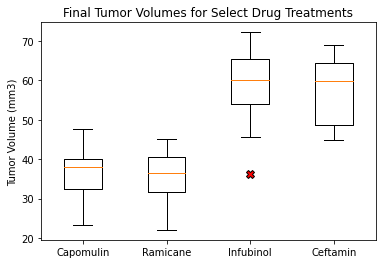

In [486]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_grp = [final_mouse[final_mouse["Drug Regimen"] == drug] for drug in drugs]
data= [drug_grp[0]["Tumor Volume (mm3)"], drug_grp[1]["Tumor Volume (mm3)"], 
       drug_grp[2]["Tumor Volume (mm3)"], drug_grp[3]["Tumor Volume (mm3)"]]   
flierprops = dict(marker='X', markerfacecolor='r', markersize=8,
                  linestyle='none')
plt.boxplot(data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4], drugs)
plt.title("Final Tumor Volumes for Select Drug Treatments")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

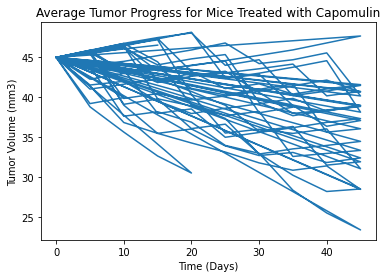

In [487]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = mouse_data[mouse_data['Drug Regimen'] == "Capomulin"]
x=cap_mouse["Timepoint"]
y=cap_mouse["Tumor Volume (mm3)"]

plt.plot(x, y)
plt.title("Average Tumor Progress for Mice Treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.show()

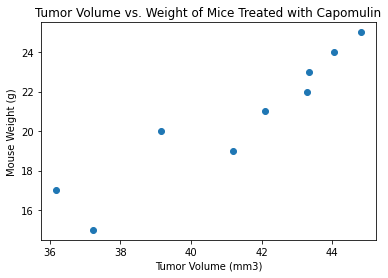

In [488]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x=cap_mouse.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
y=cap_mouse["Weight (g)"].unique()

plt.scatter(x,y)
plt.title("Tumor Volume vs. Weight of Mice Treated with Capomulin")
plt.ylabel("Mouse Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

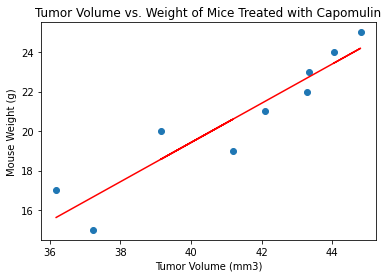

y = 0.99x + -20.28
r= 0.9342132083005745


In [489]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.title("Tumor Volume vs. Weight of Mice Treated with Capomulin")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.show()

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = pearsonr(x, y)
print(f'r= {correlation[0]}')